<a href="https://colab.research.google.com/github/rgmantovani/advancedML/blob/master/codes/aula_03_cnns/CNN_Keras_example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uso de Redes Neurais Convolucionais (*Convolutional Neural Networks - CNN*)

Disciplina: Métodos e Modelos Avançados em Ciência de Dados

Aula 03: CNNs


Começaremos nosso exemplo teste fazendo a requisição dos pacotes que necessitamos para manipular os modelos de Aprendizado Profundo (*Deep Learning - DL*), no caso as CNNs. Iremos fazer uso de um pacote em especial:
* **keras** - wrapper em R das implementações de DL em Python.

Links externos: 

* Keras: https://keras.io

* keras - pacote R: https://cran.r-project.org/web/packages/kerasR/vignettes/introduction.html


In [42]:
#Instalar o pacote keras, caso não existe, e carregá-lo no nosso ambiente
#install.packages("keras") # descomentar para instalar o pacote
library("keras")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#1 - Selecionar um conjunto de dados 

Iremos trabalhar com um conjunto de dados (*dataset*) composto por imagens. O dataset selecionado para esse exemplo é o [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html). Este dataset é composto por 
60 mil imagens, cuja resolução é 32 x 32, dividas em 10 categorias, incluindo imagens de objetos e animais. As 10 categorias existentes no CIFAR-10 são:
* classes = {avião, automóvel, pássaro, gato, veado, cachorro, sapo, cavalo, navio, e caminhão}.

In [24]:
# carregar o dataset CIFAR-10 do pacote keras
cifar = keras::dataset_cifar10()

Além do cifar, existem outros dataset já pré-carregados no pacote:'dataset_boston_housing()', 'dataset_cifar100()'; 'dataset_fashion_mnist()', 'dataset_imdb()', 'dataset_mnist()', 'dataset_reuters()'.

Dentro variável ```cifar``` teremos quatro conjuntos de dados:
* ```train$x```: conjunto de treinamento e seus respectivos atributos descritivos (pixels de cada imagem);
* ```test$y```: labels do conjunto de treinamento;
* ```train$x```: conjunto de teste e seus respectivos atributos descritivos;
* ```test$y```: labels do conjunto de teste.

Os conjuntos 'x' são arrays de imagens em RBB com dimensão: (num_samples, 32, 32, 3). Já os conjuntos 'y' são arrays categóricos com valores de 0-9, no tamanho (num_samples).


In [69]:
# Conjunto de treinamento (train$x)
# 50000 imagens no conjunto de treinamento, 32x32, 3 canais de cores (matrizes R, G, B)
str(cifar$train$x)

 int [1:50000, 1:32, 1:32, 1:3] 59 154 255 28 170 159 164 28 134 125 ...


In [61]:
# Tentando ver a informação de uma imagem
# imagem 1 - canal R
print(cifar$train$x[1,,,1])
# imagem 1 - canal G
#print(cifar$train$x[1,,,1])
# imagem 1 - canal B
#print(cifar$train$x[1,,,1])


      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]   59   43   50   68   98  119  139  145  149   149   131   125   142
 [2,]   16    0   18   51   88  120  128  127  126   116   106   101   105
 [3,]   25   16   49   83  110  129  130  121  113   112   112   106   105
 [4,]   33   38   87  106  115  117  114  105  107   121   125   109   113
 [5,]   50   59  102  127  124  121  120  114  107   125   129   106   108
 [6,]   71   84  110  129  136  131  129  119  108   122   123   105   107
 [7,]   97  111  123  130  136  132  122  121  127   138   124   120   107
 [8,]  115  119  130  140  133  127  138  137  131   133   134   108    72
 [9,]  137  128  132  128  119  123  128  130  121   137   131    74    54
[10,]  154  154  156  140  123  125  126  127  133   132    90    63    62
[11,]  154  155  156  147  133  137  139  134  141   121    80    97    90
[12,]  145  146  146  135  127  129  117  103  130   120   111   146   136
[13,]  142  141  140  144

In [68]:
# Rotulos do conjunto de treinamento (train$x) 
str(cifar$train$y)

 int [1:50000, 1] 6 9 9 4 1 1 2 7 8 3 ...


In [46]:
# vendo a distribuição de valores das classes no conjunto de treinamento
table(cifar$train$y)


   0    1    2    3    4    5    6    7    8    9 
5000 5000 5000 5000 5000 5000 5000 5000 5000 5000 

Algumas características do dataset carregado:


In [64]:
str(cifar$test$x)

 int [1:10000, 1:32, 1:32, 1:3] 158 235 158 155 65 179 160 83 23 217 ...


Os correspondetes nomes das classes são:

In [83]:
class_names = c('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print(class_names)

 [1] "airplane"   "automobile" "bird"       "cat"        "deer"      
 [6] "dog"        "frog"       "horse"      "ship"       "truck"     


#2 - Visualizar nossos dados

Vamos iniciar nossa nossa epxloração visualizando um exemplo de imagem do conjunto de treinamento usando o pacote [imager](https://dahtah.github.io/imager/imager.html#pixel-sets-pixsets).


Warning message in as.cimg.array(cifar$train$x[image.number, , , ]):
“Assuming third dimension corresponds to colour”


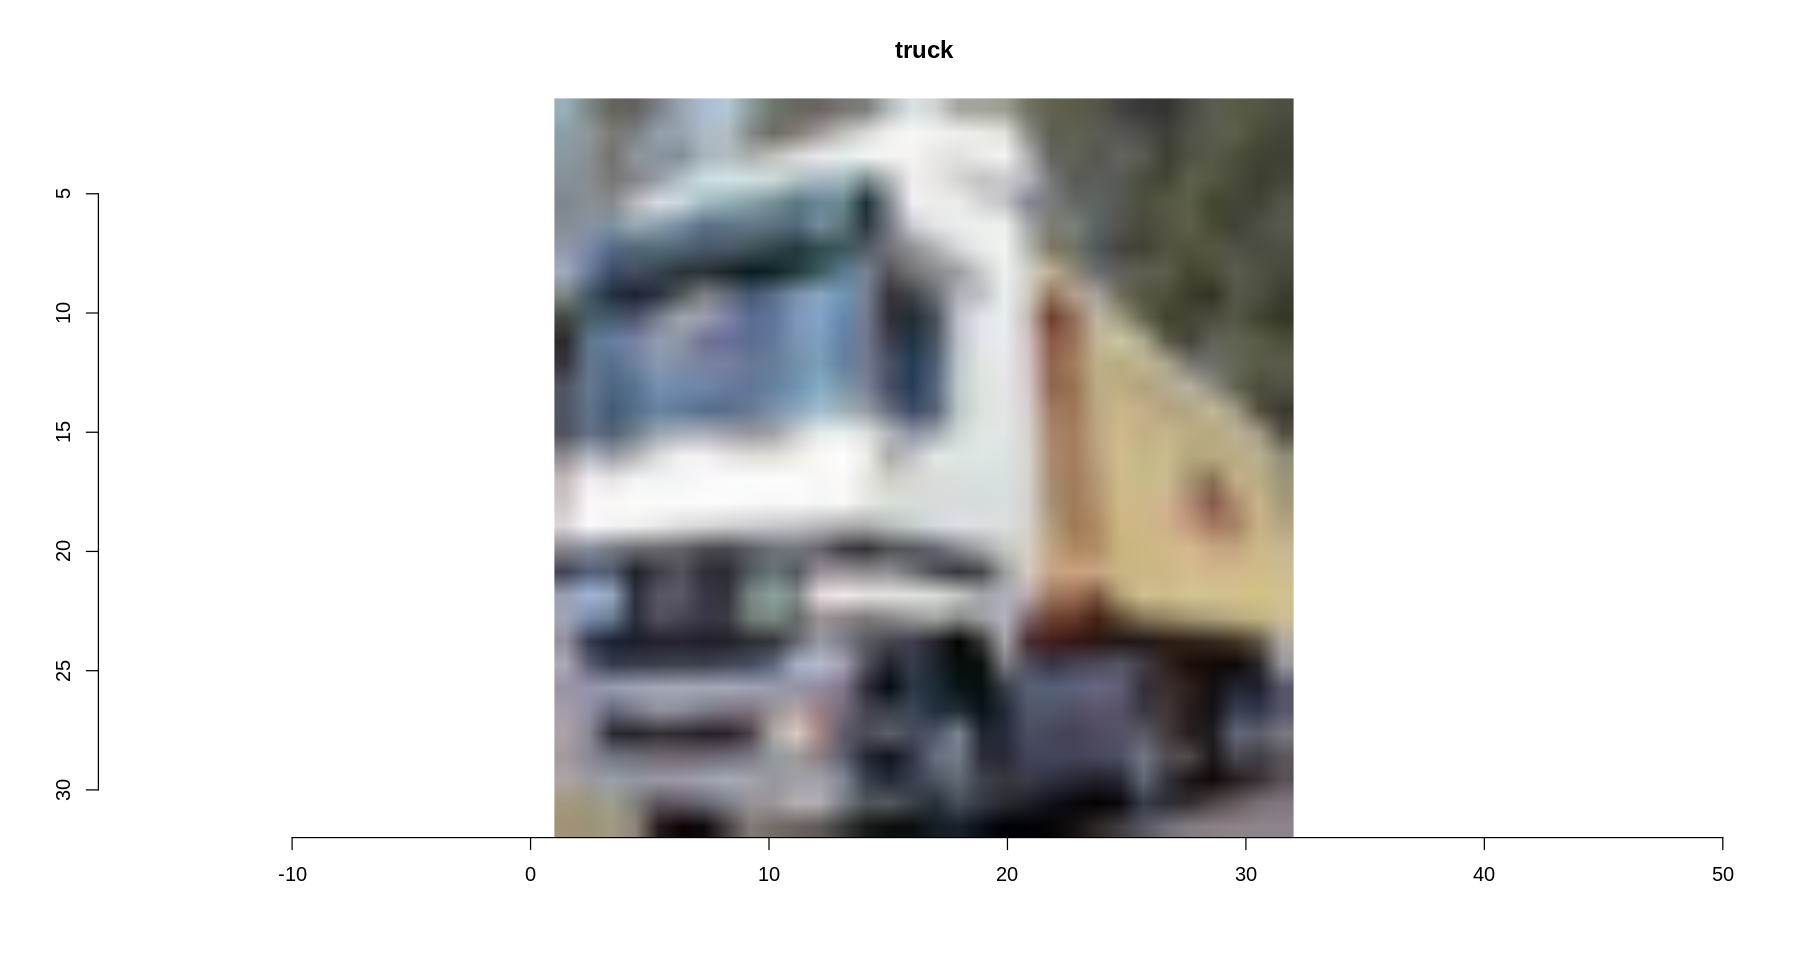

In [173]:
#install.packages("imager") # descomentar para instalar o pacote
library("imager")

# id da imagem que queremos visualizar
image.number = 2

# convertemos o array 4D para um objeto de imagem
example = as.cimg(cifar$train$x[image.number,,,])

# plotando a imagem
#plot(example) # já é capaz de ver a imagem, mas não agrada visualmente

# comandos para manipular a imagem 
imrotate(example,90) %>% mirror("x") %>% plot(main=class_names[cifar$train$y[image.number] + 1])



Podemos tentar visualizar um pouco mais dos dados que estamos manipulando. Logo, seria interessante "ver" estas imagens e como elas diferem entre si (classes). Como temos 50 mil exemplos no conjunto de treinamento vamos selecionar um pequeno subconjunto de 30 imagens e verificar os seus respectivos rótulos (labels/classes).

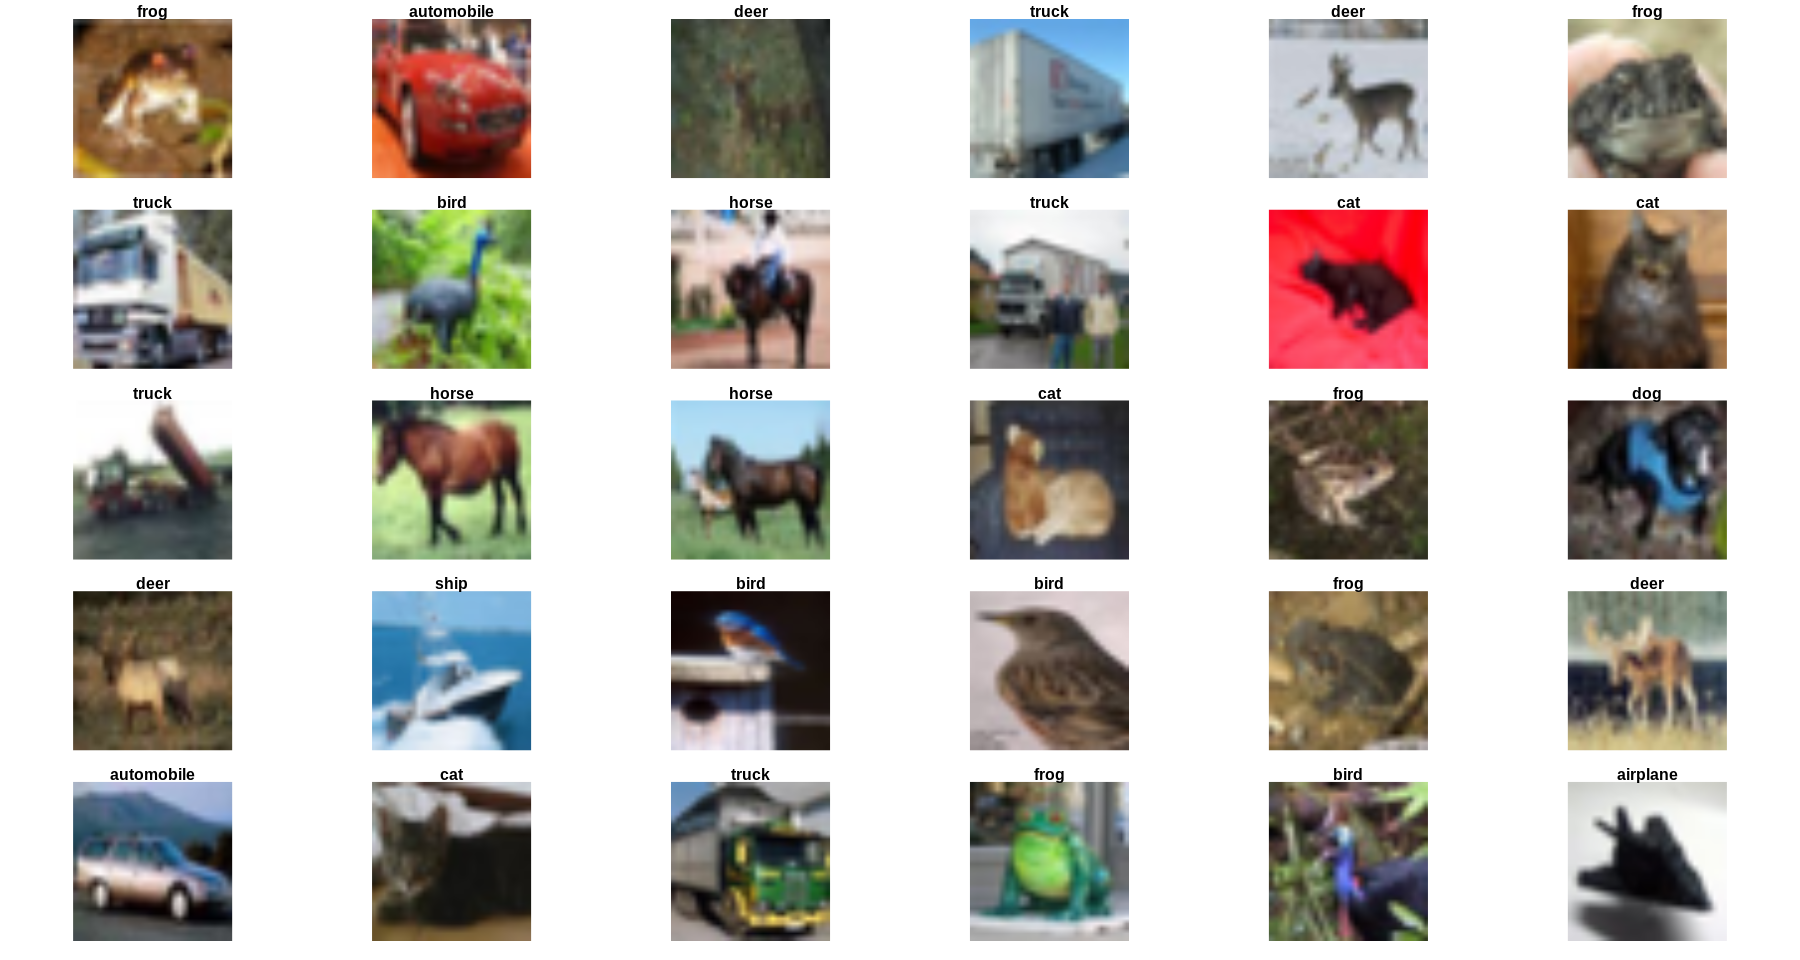

In [98]:
# selecionaremos 30 imagens
index = 1:30
#index = 31:60
#...

options(repr.plot.width=15, repr.plot.height=8)

# e as mostraremos em um grid 5 x 6 - 5 linhas, 6 colunas
par(mfcol = c(5,6), mar = rep(1, 4), oma = rep(0.2, 4))
cifar$train$x[index,,,] %>% 
  purrr::array_tree(1) %>%
  purrr::set_names(class_names[cifar$train$y[index] + 1]) %>% 
  purrr::map(as.raster, max = 255) %>%
  purrr::iwalk(~{plot(.x); title(.y)})

Seria interessante analisar também qual é a distribução das classes do problema. Podemos entãogerar um histograma para verificar a frequência de cada uma das classes, tanto no conjunto de treiamento (```q1```) como no conjunto de teste (```q2```).

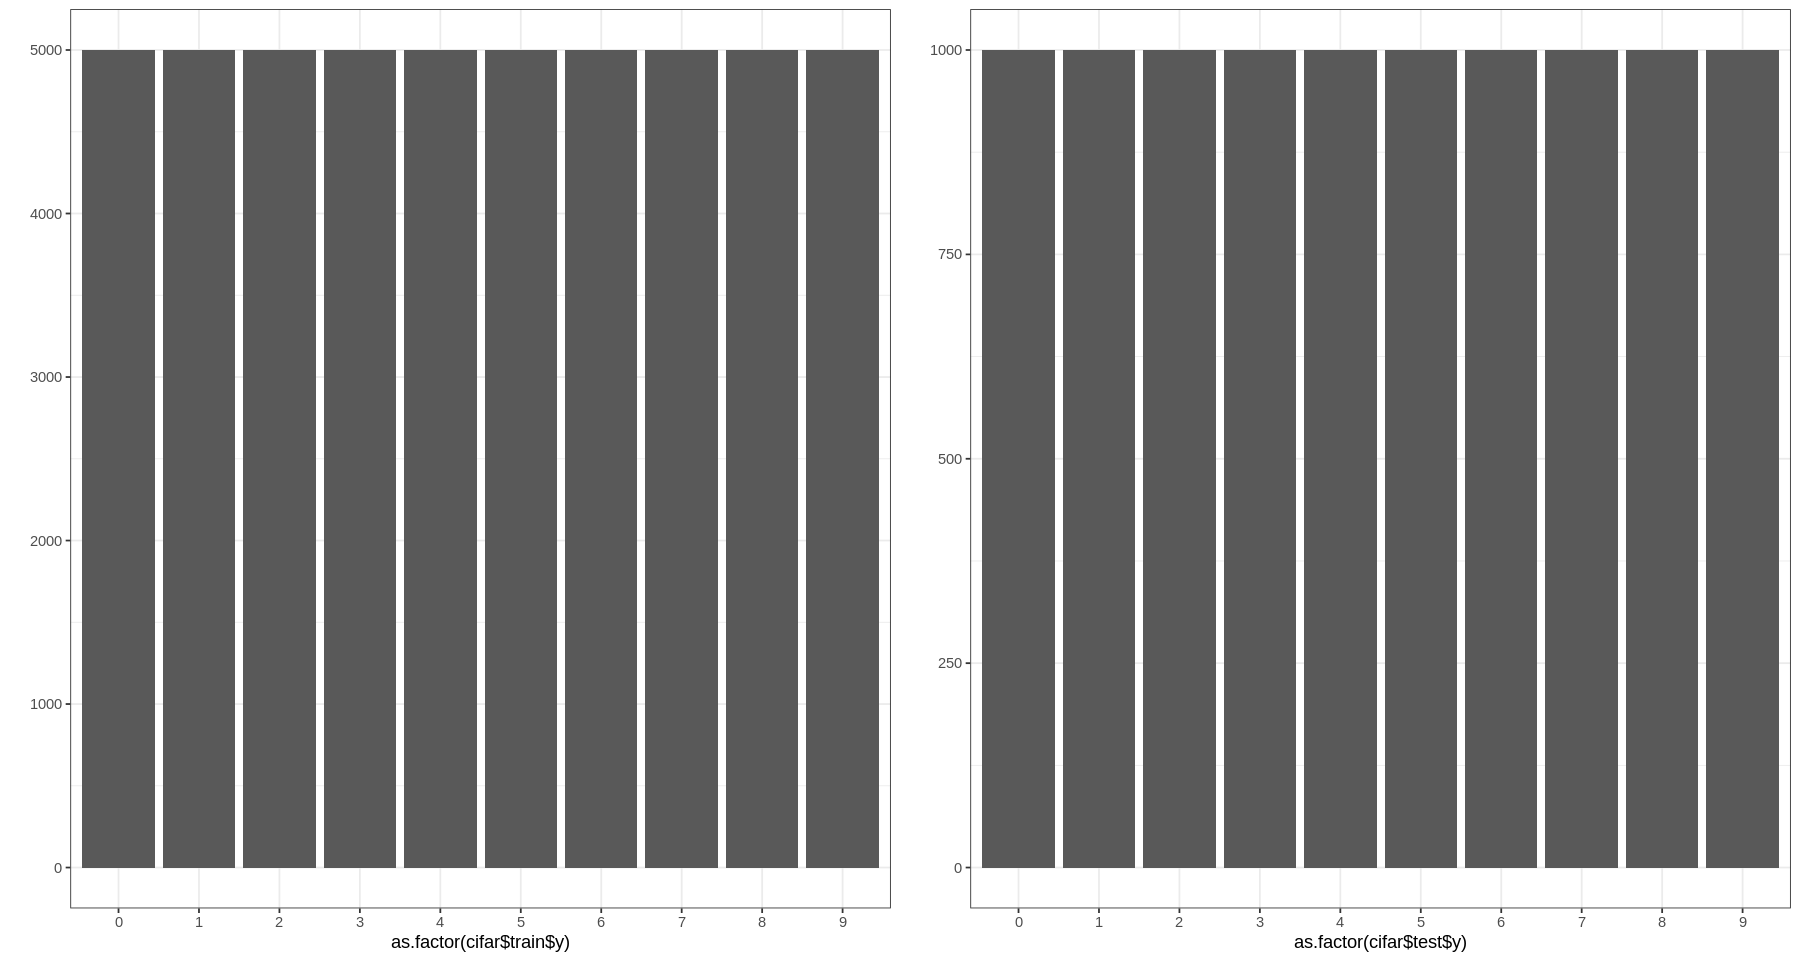

In [96]:
# gráfico com a distribuição das classes
library('ggplot2')
#install.packages('gridExtra') # descomentar para instalar o pacote
library('gridExtra')

# histograma das classes no conjunto de treinamento
q1 = qplot(as.factor(cifar$train$y)) + theme_bw()

# histograma das classes no conjunto de teste
q2 = qplot(as.factor(cifar$test$y)) + theme_bw()

# plot duplo (treino - teste)
options(repr.plot.width=15, repr.plot.height=8)
gridExtra::grid.arrange(q1, q2, ncol=2)


Podemos ver que ambos os cojuntos, treino (esquerda) e teste (direita) são balanceados, ou seja, há a mesma quantidade de exemplos de classes distintas. O que é bom, indicando que temos um bom split de dados para indução e avaliação do modelo.

#3 - Criando um modelo de CNN

Da mesma forma que trabalhamos com as MLPs, vamos inicializar o nosso modelo, isto é, criar a topologia, adicionando as camadas e respectivas funções de ativação da nossa CNN.

Lembrando que uma CNN é composta por 7 camadas:
1.   Convolucional
2.   Pooling
3.   Convolucional
4.   Pooling
5.   Convolucional 
6.   Densa
7.   Densa 

Nas camadas da CNN iremos usar funções retificadoras lineares [(R*ectified Linear Units - ReLU*)](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) como funções de ativação:

```
f(x) = max(0, x)
```

//TODO: pq usar RELU

Chttps://stats.stackexchange.com/questions/333394/what-is-the-derivative-of-the-relu-activation-function

In [188]:
model <- keras_model_sequential() %>% 
  # 1. camada convolucional
  layer_conv_2d(filters = 32, kernel_size = c(3,3), activation = "relu", input_shape = c(32,32,3)) %>% 
  # 2. pooling
  layer_max_pooling_2d(pool_size = c(2,2)) %>% 
  # 3. camada convolucional
  layer_conv_2d(filters = 64, kernel_size = c(3,3), activation = "relu") %>% 
  # 4. pooling
  layer_max_pooling_2d(pool_size = c(2,2)) %>% 
  # 5. camada convolucional
  layer_conv_2d(filters = 64, kernel_size = c(3,3), activation = "relu")

In [189]:
summary(model)

Model: "sequential_3"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_5 (Conv2D)                   (None, 30, 30, 32)              896         
________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)      (None, 15, 15, 32)              0           
________________________________________________________________________________
conv2d_4 (Conv2D)                   (None, 13, 13, 64)              18496       
________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)      (None, 6, 6, 64)                0           
________________________________________________________________________________
conv2d_3 (Conv2D)                   (None, 4, 4, 64)                36928       
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________

Adicionamos agora as duas últimas camadas do modelo: duas camadas densas de neurônios, totalmente conexos, como nas MLPs. Entretanto, precisamos adicionar uma operação de achatamento (*flatten*) para converter as 3 dimensões dos sinais em um único sinal (1 dimensão) que alimentará as camadas densas.
Além disso, a última camada terá uma quantidade de neurônios igual ao número de classes que desejamos identificar. 

In [190]:
model %>% 
  # achatamento do sinal (3D ->1D)
  layer_flatten() %>% 
  # camada densa
  layer_dense(units = 64, activation = "relu") %>% 
  # camada de saída (densa), 10 neurônios, 1 para cada classe
  layer_dense(units = 10, activation = "softmax")

In [191]:
summary(model)

Model: "sequential_3"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_5 (Conv2D)                   (None, 30, 30, 32)              896         
________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)      (None, 15, 15, 32)              0           
________________________________________________________________________________
conv2d_4 (Conv2D)                   (None, 13, 13, 64)              18496       
________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)      (None, 6, 6, 64)                0           
________________________________________________________________________________
conv2d_3 (Conv2D)                   (None, 4, 4, 64)                36928       
________________________________________________________________________________
flatte

#4. Treinando nossa CNN e induzindo o modelo preditivo

Uma vez criado o nosso modelo inicial (não-treinado), precisamos especificar as opções para realizar o **treinamento** da CNN. Para isso, vamos escolher três parâmetros:
*     ```optimizer``` - escolha de um algoritmo de treinamento (adam, sgd, ...)
*     ```loss``` - escolher uma medida de erro para ser minizada durante o treinamento;
*     ```metrics``` - uma (ou mais) medida(s) de desempenho para avaliar as predições do modelo considerando o conjunto de teste.



In [192]:
model %>% compile(
  optimizer = "adam", #sgd
  loss = "sparse_categorical_crossentropy", #loss
  metrics = "accuracy"
)

Feito isto, iremos induzir nosso modelo. Para isso, usaremos a função ```fit```. Aqui nossas escolhas de configuração serão:
* ```x```: dados de treinamento
* ```y```: rótulos dos dados de treinamento
* ```epocs```: número de épocas para repetirmos o processo de redução do erro;
* ```validation_data```: subconjunto dos dados usado para avaliar a convergência do algoritmo ao final de cada época. O modelo não usa esses dados para treinamento.


In [194]:
history <- model %>% 
  fit(
    x = cifar$train$x, # input data
    y = cifar$train$y, # target data
    epochs = 10,       # numero de epocas para treinar o modelo 
    validation_data = unname(cifar$test), # dados usados para validar o modelo depois de cada epoca
    verbose = 1 # 0 - silent, 1 - progress bar, 2 = one line per epoch
  )

Uma vez o modelo treinado, podemos ver a congerência do algoritmo ao longo das épocas. Por default, as implementações que exploramos armazenam os dados na variável ```history```. Assim, podemos plotá-la e verificar as curvas de convergência, considerando a redução do erro e medidas de validação dos dados.

In [200]:
# visualizando as informações históricas do treinamento do algoritmo
as.data.frame(history)

epoch,value,metric,data
<int>,<dbl>,<fct>,<fct>
1,1.2697521,loss,training
2,1.1255128,loss,training
3,1.0257971,loss,training
4,0.9457282,loss,training
5,0.8846040,loss,training
6,0.8233740,loss,training
7,0.7790251,loss,training
8,0.7290642,loss,training
9,0.6877989,loss,training


`geom_smooth()` using formula 'y ~ x'



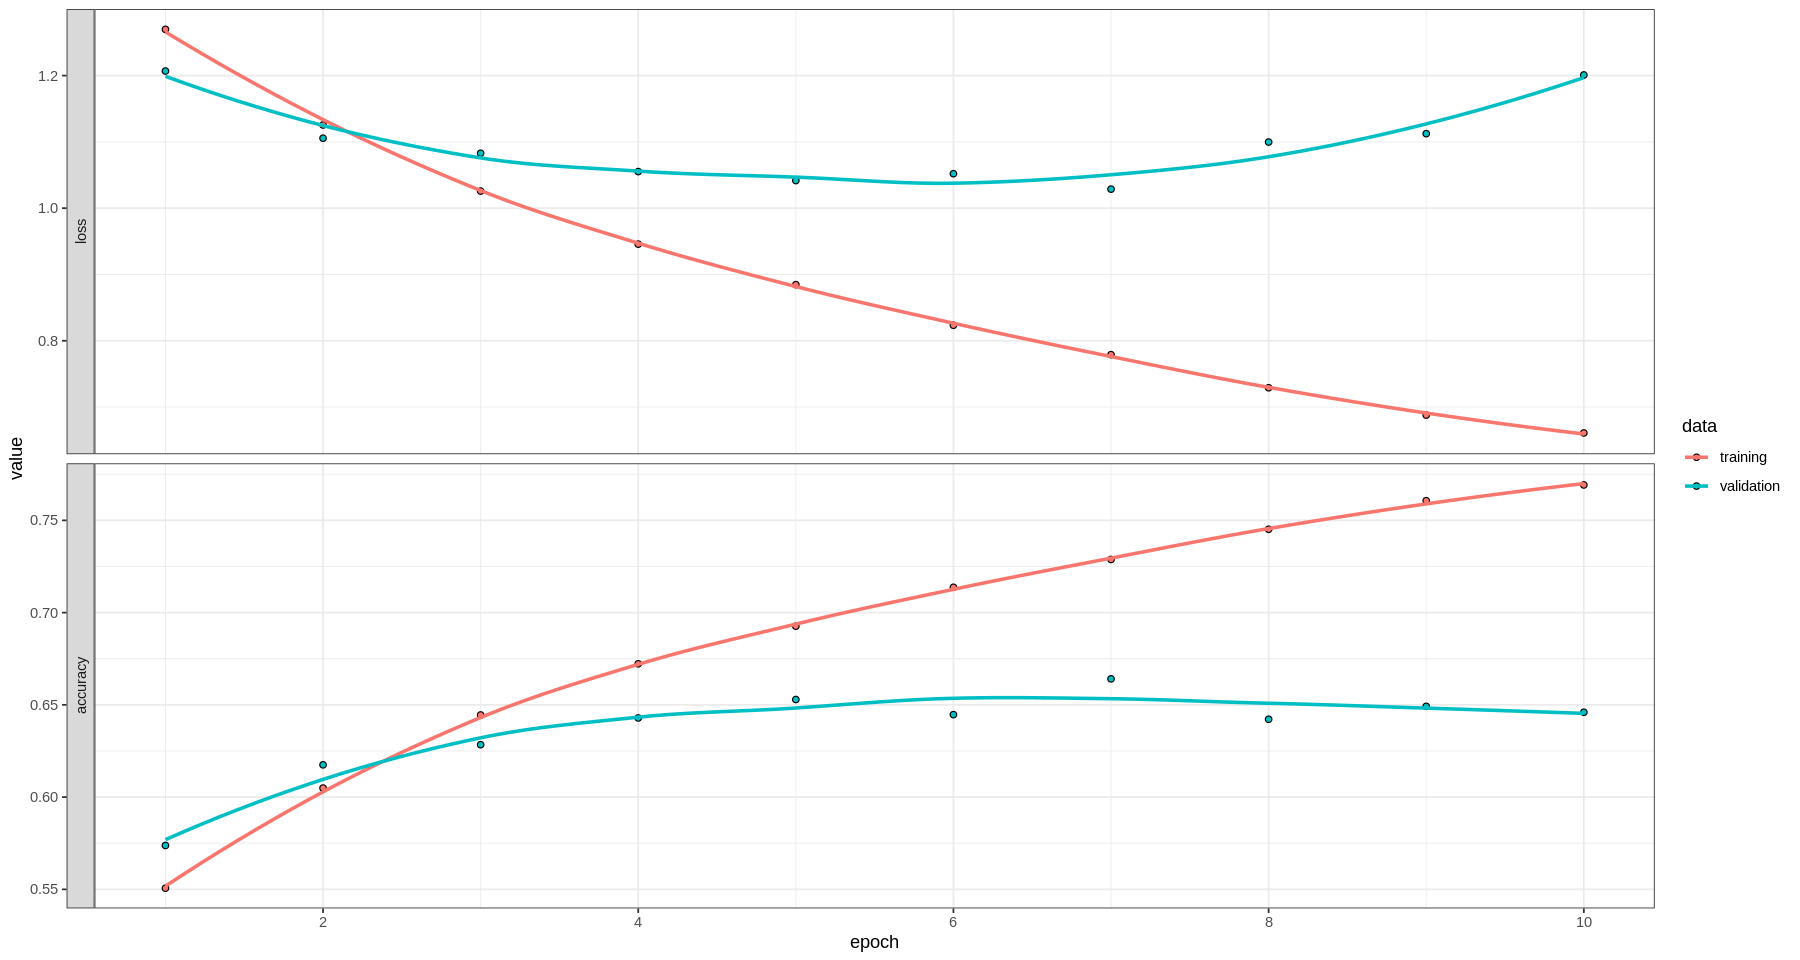

In [201]:
options(repr.plot.width=15, repr.plot.height=8)
plot(history) + theme_bw()

# 5. Realizando predições com o modelo obtido

Tendo o modelo induzido, por meio do treinamento do algoritmo, vamos agora realizar as predições no conjunto de teste, não usado até então.

Podemos também analisar o desempenho do algoritmo no conjunto de treinamento, para fins didáticos. Abaixo, verificamos primeiro a matriz de confusão com as predições obtidas. Os números que compõem a diagnoal principal são os exemplos que foram corretamente rotulado.

In [234]:
# realizando as predicoes no conjunto de teste, só para checagem
pred = model %>% predict_classes(cifar$train$x)

# calculando a matriz de confusão
tab1 = table(Predicted=pred, Actual=cifar$train$y)

A partir da matriz de confusão conseguimos mensurar a **acurácia** do modelo - numero de acertos/numero de exemplos. O número de acertos é obtido pela soma dos elementos da diagonal principal da matriz. E o número de elemento, sabemos tanto pelo conjunto de teste, como o somatório de todos os elementos da matriz de confusão. Assim, a acurácia do nosso modelo seria:

In [ ]:
acc = sum(diag(tab1))/sum(tab1)
cat("Acurácia do modelo = ", acc, "\n")

E, as vezes também é interessante visualizar as predições para cada amostra/exemplo a fim de identificar potenciais erros ou rúidos que podem ser trabalhados para melhorar o desempenho do modelo induzido. Abaixo, executamos alguns comandos para ver qual é a probabilidade de um exemplo pertencer a qualquer uma das 10 classes. As duas últimas colunas indicam o valor predito (Predicted) e o valor real esperado (Truth) que será o label correto para aquele exemplo.

In [215]:
# obtendo as predicoes mas em termos de probabilidades
prob = model %>% predict_proba(cifar$train$x)
df = cbind(prob, Predicted_class = pred, Actual=cifar$train$y)

In [217]:
# verificando as predicoes, em termos de probabilidades para cada um dos exemplos
colnames(df)[1:10] = paste("Prob", class_names, sep=".")
colnames(df)[11:12] = c("Predicted", "Truth")
head(round(df, 5))

Prob.airplane,Prob.automobile,Prob.bird,Prob.cat,Prob.deer,Prob.dog,Prob.frog,Prob.horse,Prob.ship,Prob.truck,Predicted,Truth
0.00000,0.00000,0.00361,0.05278,0.00110,0.05365,0.88710,0.00175,0.00000,0.00000,6,6
0.00122,0.00030,0.01009,0.00003,0.00009,0.00010,0.00012,0.00023,0.00002,0.98780,9,9
0.06376,0.01451,0.07113,0.04758,0.06747,0.45486,0.13339,0.00936,0.06500,0.07293,5,9
0.00002,0.00001,0.00431,0.00082,0.94544,0.02048,0.02715,0.00176,0.00000,0.00001,4,4
0.00000,0.99980,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00020,1,1
0.00000,0.10360,0.00007,0.00007,0.00000,0.00046,0.89569,0.00000,0.00000,0.00010,6,1


Entretanto, o mais interessante aqui é avaliar o modelo induzido no **conjunto de teste**. Assim, repetimos os passos descrito acima para ```cifar$test```:
* matriz de confusão das predições;
* acurácia geral do modelo
* predições individuais com a probabilidade de cada classe.


In [221]:
evaluate(model, cifar$test$x, cifar$test$y, verbose = 0)

loss accuracy 
1.200991 0.646000

In [223]:
pred_test = model %>% predict_classes(cifar$test$x)
tab = table(Predicted = pred_test, Actual = cifar$test$y)
print(tab)

         Actual
Predicted   0   1   2   3   4   5   6   7   8   9
        0 764  24  79  23  27   8   4  21 197  53
        1  30 825   6   8   4   7   4   3  50 136
        2  51   8 517  79  79  52  29  43  28  29
        3  19  15  57 334  49 103  35  23  40  33
        4  38  10  85  91 593  55  26  66  11   6
        5  12  11  95 284  67 659  35 122  14  23
        6  21  31 116 127 103  58 856  34  24  42
        7  22  11  38  39  76  52   9 681   8  28
        8  31  24   4  11   0   5   2   0 610  29
        9  12  41   3   4   2   1   0   7  18 621


In [229]:
acc = sum(diag(tab))/sum(tab)
cat("Acurácia do modelo = ", acc, "\n")

Acurácia do modelo =  0.646 


In [232]:
prob2 = model %>% predict_proba(cifar$test$x)
df2 = cbind(prob2, Predicted_class = pred_test, Actual=cifar$test$y)

In [233]:
# verificando as predicoes, em termos de probabilidades para cada um dos exemplos
colnames(df2)[1:10] = paste("Prob", class_names, sep=".")
colnames(df2)[11:12] = c("Predicted", "Truth")
head(round(df2, 5))

Prob.airplane,Prob.automobile,Prob.bird,Prob.cat,Prob.deer,Prob.dog,Prob.frog,Prob.horse,Prob.ship,Prob.truck,Predicted,Truth
0.00096,0.00048,0.00154,0.60103,0.00073,0.33219,0.06008,0.00072,0.00224,0.00003,3,3
0.12430,0.04693,0.00002,0.00000,0.00000,0.00000,0.00000,0.00000,0.82286,0.00589,8,8
0.30149,0.04111,0.02251,0.08929,0.00511,0.04386,0.00332,0.00702,0.45138,0.03491,8,8
0.99992,0.00000,0.00008,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0
0.00000,0.00000,0.00661,0.00224,0.53588,0.03617,0.41903,0.00007,0.00000,0.00000,4,6
0.00005,0.00018,0.01357,0.00903,0.01896,0.04841,0.90409,0.00522,0.00006,0.00042,6,6


#6. Síntese e considerações finais

No exemplo aqui demonstrado aplicamos uma CNN para realizar uma tarefa de classificação de imagens. O dataset que exploramos foi o CIFAR-10, com imagens originalmente categorizadas em 10 classes distintas. 

Nosso passo a passo de indução e avaliação de um modelo é feito epxlorando as implementações do keras, bilioteca original do Python, mas com pacote disponível que realiza o interfaceamento com R.

Basicamente seguimos um fluxo padrão de geração/indução de modelo preditivo:
1.  Obtenção dos dados (CIFAR-10);
2.  Separação dos dados entre conjuntos de treino e teste (```cifar$train``` e ```cifar$test```);
3.  Criação de um modelo inicial com a arquitetura padrão de CNN. Definimos um modelo sequencial (forward) e adicionamos cada uma das camadas da CNN, especificando a quantidade de neurônios, tamanho de possíveis kernels, e os correspondentes tipos de funções de ativação;
4.  Definição dos parâmetros usados no treinamento do algoritmo (algoritmo de otimização/redução do erro, medida reduzida, e medidas de desempenho)
5.  Treinamento e indução do modelo preditivo (```fit```); e
5.  Avaliação do modelo induzido no cojunto de testes (predições e probabilidades).

Por fim, é importante salientar que grande parte dos processos acima descritos são facilitados pelas ferramentas que exploramos (keras). Isso é imprescíndicel para um programador/cientista de dados/pesquisador, pois permite que nos dediquemos ao estudo do problema e das possíveis implicações dos modelos gerados, uma vez que a modelagem/implementação já é fornecida por uma ferramenta robusta. Como diriam alguns professores com que já trabalhei ao longo da vida: 

  "*Não precisamos reinventar a roda, mas saber usar o que já existe e expandir a fronteira do conhecimento*.

Bons estudos :)
